In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
cricket_data = pd.read_excel(r"G:\DataSets\CRICKETERS_DATA.xlsx")
cricket_data

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,TEST
1,147,143,5238,39.68,85.25,ODI
2,71,122,6147,53.92,58.22,TEST
3,211,203,9779,58.20,92.12,ODI
4,62,58,2102,48.88,136.22,T20
...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,T20
71,62,105,4809,49.57,46.90,TEST
72,25,43,1479,39.97,55.14,TEST
73,183,177,6748,44.98,87.18,ODI


In [76]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mat       75 non-null     int64  
 1   Inns      75 non-null     int64  
 2   Runs      75 non-null     int64  
 3   Ave       75 non-null     float64
 4   SR        75 non-null     float64
 5   CATEGORY  75 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 3.6+ KB


In [77]:
cricket_data.duplicated().sum()

0

In [78]:
cricket_data.describe()

,Mat,Inns,Runs,Ave,SR
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,93.253333,104.960000,3958.706667,38.392267,90.918400
std,76.785432,79.784412,3585.083627,13.147980,32.969055
min,4.000000,4.000000,61.000000,10.750000,26.700000
25%,46.500000,55.000000,1483.000000,30.870000,58.665000
50%,74.000000,86.000000,2779.000000,37.540000,87.180000
75%,111.500000,140.000000,6029.500000,46.575000,120.995000
max,463.000000,452.000000,18426.000000,99.940000,161.530000


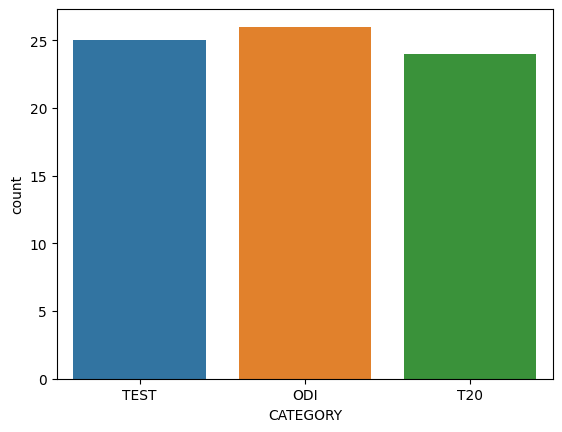

In [79]:
sns.countplot(x='CATEGORY',data=cricket_data)
plt.show()

Encoding the Categorical Values

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cricket_data['CATEGORY'] = le.fit_transform(cricket_data.CATEGORY)

In [81]:
cricket_data.head()

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,2
1,147,143,5238,39.68,85.25,0
2,71,122,6147,53.92,58.22,2
3,211,203,9779,58.20,92.12,0
4,62,58,2102,48.88,136.22,1


In [82]:
cricket_data=cricket_data.drop(['Mat'],axis=1)

In [83]:
cricket_data.head()

,Inns,Runs,Ave,SR,CATEGORY
0,104,4154,41.95,51.49,2
1,143,5238,39.68,85.25,0
2,122,6147,53.92,58.22,2
3,203,9779,58.20,92.12,0
4,58,2102,48.88,136.22,1


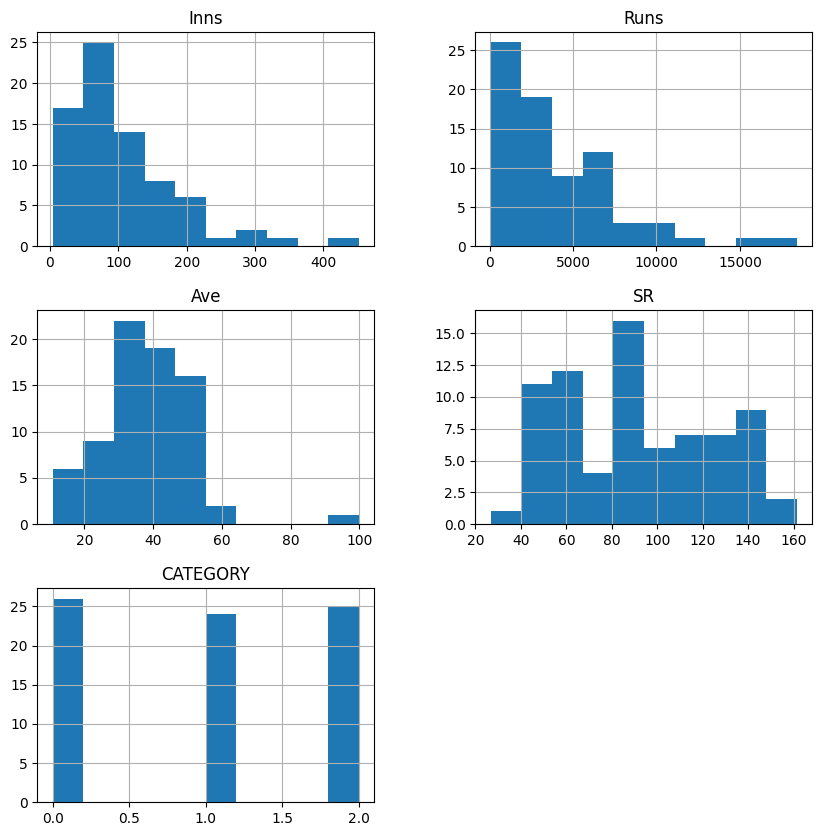

In [84]:
cricket_data.hist(figsize=(10,10))
plt.show()

In [85]:
from sklearn.cluster import KMeans
k_cluster_model = KMeans(n_clusters=3,random_state=42)
learner = k_cluster_model.fit(cricket_data)

e:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [86]:
learner.inertia_

136422528.3477022

In [87]:
cricket_data.head()

,Inns,Runs,Ave,SR,CATEGORY
0,104,4154,41.95,51.49,2
1,143,5238,39.68,85.25,0
2,122,6147,53.92,58.22,2
3,203,9779,58.20,92.12,0
4,58,2102,48.88,136.22,1


In [88]:
cricket_data['cluster'] = learner.predict(cricket_data)
cricket_data

,Inns,Runs,Ave,SR,CATEGORY,cluster
0,104,4154,41.95,51.49,2,1
1,143,5238,39.68,85.25,0,1
2,122,6147,53.92,58.22,2,1
3,203,9779,58.20,92.12,0,1
4,58,2102,48.88,136.22,1,0
...,...,...,...,...,...,...
70,71,1825,37.24,124.31,1,0
71,105,4809,49.57,46.90,2,1
72,43,1479,39.97,55.14,2,0
73,177,6748,44.98,87.18,0,1
